# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты(-ки) гр. 0303 Торопыгин Антон и Тишкин Максим. Вариант №1.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

В качестве временного ряда рассматривается дискретный сигнал с шагом дискретизации, равным единице.

Под полиномиальным сглаживанием понимается аппроксимация в смысле МНК значений конечного (нечетного) числа элементов сглаживаемого ряда полиномом заданного порядка с присвоением среднему из этих элементов значения сглаживающего полинома в центре выбранного временного отрезка. Такой подход соответствует так называемому сглаживанию в скользящем окне.

В качестве исследуемых формул численного интегрирования используются квадратурные формулы Ньютона-Котеса.

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы


1) Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построим графики $\tilde H(f)$. Проинтерпретируем частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $s(t)$. 

Выходной сигнал: $y(t) = A + Bt$.

Если осуществлять приближение по МНК прямой линией по $m$ точкам, то необходимо минимизировать следующее выражение для нечетных чисел:

$$F(A, B) = \sum_{k=-m}^{m} (s_k - y_k)^2 = \sum_{k=-m}^{m}(s_k - A - Bk)^2 => min$$

Переменными в этой задаче являются А и В. Продифференцируем и приравняем к нулю, чтобы найти минимум. Посчитаем частные производные по А и В:

$$
\begin{cases}
\frac {\delta F(A, B)} {\delta A} = 0, \\
\frac {\delta F(A, B)} {\delta B} = 0
\end{cases}
$$

После преобразований получаем:

$$
\begin{cases}
A = \frac {1} {2m+1} \sum_{k=-m}^{m} s_k, \\
B = \sum_{k=-m}^{m} \frac {s_k} {k^2}
\end{cases}
$$

В итоге получаем: 

$y_0 = A = \frac {1} {2m+1} \sum_{k=-m}^{m} s_k$

В общем случае:

$
\begin{cases}
y_0 = A = \frac {1} {2m+1} \sum_{k=-m}^{m} s_k, \\
s_k = e^{i\omega n}
\end{cases} => y_n = \frac {1} {2m+1} \sum_{k=-m}^{m} (e^{-mi\omega} + e^{(-m+1)i\omega} + ... + e^{mi\omega}) = H(\omega )
$

Получаем, что

$
H(\omega) = H(2\pi f) = \tilde H(f) = \frac {sin(\frac {(2m+1) \omega} {2})} {(2m+1) sin(\frac {\omega} {2})}
$

Таким образом, формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам соответственно равны: 


$H_3(f) = \frac {sin(3\pi f)} {3 sin (\pi f)},$

$H_5(f) = \frac {sin(5\pi f)} {5 sin (\pi f)}, $

$H_7(f) = \frac {sin(7\pi f)} {7 sin (\pi f)}, $

$H_9(f) = \frac {sin(9\pi f)} {9 sin (\pi f)} $

Графики для передаточных функций представлены ниже.

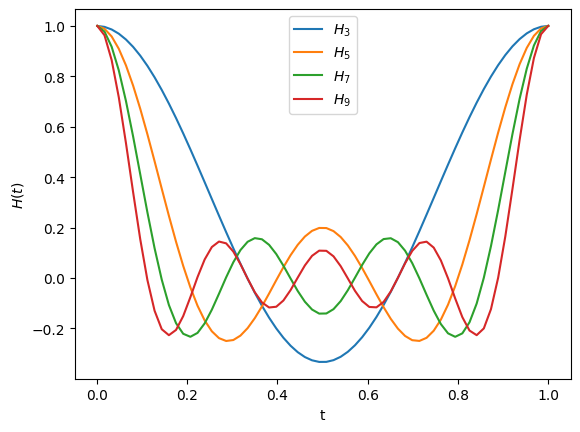

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def task1():
    h_3 = lambda x: np.sin(3*math.pi*x)/(3*np.sin(x*math.pi))
    h_5 = lambda x: np.sin(5*math.pi*x)/(5*np.sin(x*math.pi))
    h_7 = lambda x: np.sin(7*math.pi*x)/(7*np.sin(x*math.pi))
    h_9 = lambda x: np.sin(9*math.pi*x)/(9*np.sin(x*math.pi))

    t = np.linspace(0.001, 1.0, 64)

    plt.plot(t, h_3(t), label=r'$H_3$')
    plt.plot(t, h_5(t), label=r'$H_5$')
    plt.plot(t, h_7(t), label=r'$H_7$')
    plt.plot(t, h_9(t), label=r'$H_9$')
    plt.xlabel('t')
    plt.ylabel(r'$H(t)$')
    plt.legend()
    plt.show()

task1()

Как видно на графиках, за один период каждая из функций имеет ровно столько экстремумов, сколько точек было использовано для её построения и чем больше экстремумов, тем больше колебаний. К тому же, поряок гладкости увеличиваетс с увеличением количества точек для потсроения функции.

2) Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построим графики $\tilde H(f)$. Проинтерпретируем частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $s(t)$. 

Выходной сигнал: $y(t) = A + Bt + Ct^2$.

Если осуществлять приближение по МНК прямой линией по $m$ точкам, то необходимо минимизировать следующее выражение для нечетных чисел:

$$F(A, B, C) = \sum_{k=-m}^{m} (s_k - y_k)^2 = \sum_{k=-m}^{m}(s_k - A - Bk - Ck^2)^2 => min$$

Переменными в этой задаче являются А и C. Продифференцируем и приравняем к нулю, чтобы найти минимум. Посчитаем частные производные по А и C:

$$
\begin{cases}
\frac {\delta F(A, B, C)} {\delta A} = 0, \\
\frac {\delta F(A, B, C)} {\delta C} = 0
\end{cases}
$$

После преобразований получаем:

$$
\begin{cases}
(2m + 1) A + \frac {m(m + 1)(2m + 1)} {3} C = \sum_{k=-m}^m s_k \\
\frac {m (m + 1) (2m + 1)} {3} A + \frac {m (m + 1) (2m + 1) (3m^2 + 3m - 1)} {15} C = \sum_{k=-m}^m s_k k^2
\end{cases}
$$

В итоге получаем: 

$y_0 = A = \frac {\sum_{k=-m}^m s_k k^2 s_k - \frac {3m^2 + 3m - 1} {5} \sum_{k=-m}^m s_k}
{\frac {m (m + 1) (2m + 1)} {3} - \frac{(3m^2 + 3m - 1) (2m + 1)} {5}}$

В общем случае при $s_n = e^{i\omega n}$:

$y_n = \frac {1} {21} (-2e^{-3i \omega} + 3e^{-2i \omega} + 6e^{-i \omega} + 7 + 6e^{i \omega} + 3e^{2i \omega} - 2e^{3i \omega})e^{i\omega n} = H(\omega)e^{i\omega n}$

$H(\omega) =\frac {1} {21} (7+ 12 cos\omega + 6cos2\omega - 4cos3\omega) = H(2\pi f) = \tilde H(f)$

Таким образом, формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам соответственно равны: 

$H_7(f) = \frac {1} {21} (7+ 12 cos(2\pi f) + 6cos(4 \pi f) - 4cos(6 \pi f))$,

$H_9(f) = \frac {1} {231} (59+ 108 cos(2\pi f) + 78cos(4 \pi f) + 28cos(6 \pi f) - 42cos(8\pi f))$,

$H_{11}(f) = \frac {1} {429} (89+ 168 cos(2\pi f) + 138cos(4 \pi f) + 88cos(6 \pi f) + 18cos(8\pi f) - 72cos(10\pi f))$,

$H_{13}(f) = \frac {1} {143} (25+ 48 cos(2\pi f) + 42cos(4 \pi f) + 32cos(6 \pi f)+ 18cos(8\pi f) - 22cos(10\pi f))$ 

Графики функций представлены ниже.

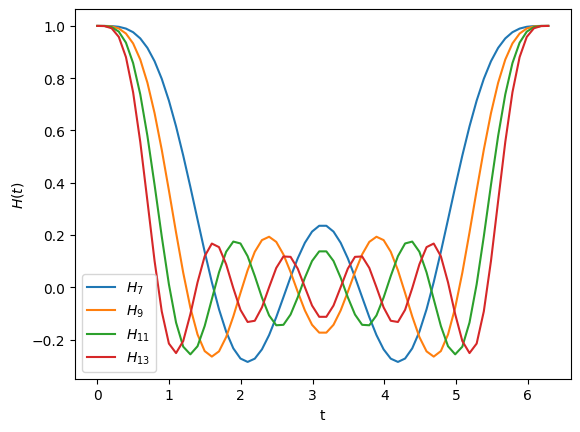

In [4]:
def task2():
    h_7 = lambda x: 1 / 21 * (7 + 12 * np.cos(x) + 6 * np.cos(2 * x) - 4 * np.cos(3 * x))
    h_9 = lambda x: 1 / 231 * (59 + 108 * np.cos(x) + 78 * np.cos(2 * x) + 28 * np.cos(3 * x) - 42 * np.cos(4 * x))
    h_11 = lambda x: 1 / 429 * (
                89 + 168 * np.cos(x) + 138 * np.cos(2 * x) + 88 * np.cos(3 * x) + 18 * np.cos(4 * x) - 72 * np.cos(
            5 * x))
    h_13 = lambda x: 1 / 143 * (
                25 + 48 * np.cos(x) + 42 * np.cos(2 * x) + 32 * np.cos(3 * x) + 18 * np.cos(4 * x) - 22 * np.cos(6 * x))

    t = np.linspace(0, 2 * math.pi, 64)

    plt.plot(t, h_7(t), label=r'$H_7$')
    plt.plot(t, h_9(t), label=r'$H_9$')
    plt.plot(t, h_11(t), label=r'$H_{11}$')
    plt.plot(t, h_13(t), label=r'$H_{13}$')
    plt.xlabel('t')
    plt.ylabel(r'$H(t)$')
    plt.legend()
    plt.show()

task2()

3) Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построим графики $\tilde H(f)$. Проинтерпретируем частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $s(t)$. 

Выходной сигнал: $y(t) = A + Bt + Ct^2+Dt^3+Et^4$.

Если осуществлять приближение по МНК прямой линией по $m$ точкам, то необходимо минимизировать следующее выражение для нечетных чисел:

$$F(A, B, C, D, E) = \sum_{k=-m}^{m} (s_k - y_k)^2 = \sum_{k=-m}^{m}(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2 => min$$

Переменными в этой задаче являются А и C. Продифференцируем и приравняем к нулю, чтобы найти минимум. Посчитаем частные производные по А, C и Е:

$$
\begin{cases}
\frac {\delta F(A, B, C, D, E)} {\delta A} = 0, \\
\frac {\delta F(A, B, C, D, E)} {\delta C} = 0. \\
\frac {\delta F(A, B, C, D, E)} {\delta E} = 0
\end{cases}
$$

После преобразований получаем:

$$
\begin{cases}
(2m + 1) A + \frac {m(m + 1)(2m + 1)} {3} C + \frac {m (m + 1) (2m + 1) (3m^2 + 3m - 1)} {15} E= \sum_{k=-m}^m s_k \\
\frac {m (m + 1) (2m + 1)} {3} A + \frac {m (m + 1) (2m + 1) (3m^2 + 3m - 1)} {15} C  + 
\\
+ \frac {m (m+1) (2m+1) (1 - 3m + 6m^3 + 3m^4)} {21} E = \sum_{k=-m}^{m}k^2s_k
= \sum_{k=-m}^m s_k k^2 \\
\frac {m (m + 1) (2m + 1) (3m^2 + 3m - 1)} {15} A 
+ \frac {m (m+1) (2m+1) (1 - 3m + 6m^3 + 3m^4)} {21} C + \\
+ \frac {m(m+1)(2m+1)(-3+9m-m^2-15m^3+5m^4+15m^5+5m^6} {45} = \sum_{k=-m}^m k^4s_k
\end{cases}

$$

В общем случае при $s_n = e^{i\omega n}$:
$$
y_n = \frac {1} {429} (15e^{-4i\omega} - 55e^{-3i\omega} + 30e^{-2i\omega} + 135e^{-i\omega} + 179 + \\ 
+ 135e^{i\omega} + 30e^{2i\omega} - 55e^{3i\omega} + 14e^{4i\omega})e^{i\omega n} = H(\omega)e^{i\omega n}
$$

$$
H(\omega) = H(2\pi f) = \tilde H(f) = \frac {1} {429} (179 + 270cos\omega + 60cos2\omega - 110cos3\omega + 30cos4\omega)
$$

Таким образом, формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени по 9, 11, 13 и 15 точкам соответственно равны:

$H_9(f) = \frac {1} {429} (179+ 279 cos(2\pi f) + 60cos(4 \pi f) - 110cos(6 \pi f) + 30cos(8\pi f))$,

$H_11(f) = \frac {1} {429} (143+ 240 cos(2\pi f) + 120cos(4 \pi f) - 20cos(6 \pi f) - 90cos(8\pi f) + 36cos(10\pi f))$,

$H_13(f) = \frac {1} {2431} (677+ 1200 cos(2\pi f) + 780cos(4 \pi f) + 220cos(6 \pi f) -270cos(8\pi f) - 396cos(10\pi f) + 220cos(12\pi f))$,

$$H_15(f) = \frac {1} {46189} (11063+ 20250 cos(2\pi f) + 15000cos(4 \pi f) + \\ +7510cos(6 \pi f) + 330cos(8\pi f) - 5874cos(10\pi f) + 5720(12\pi f) + 4290(14\pi f))$$,

Графики представлены ниже.

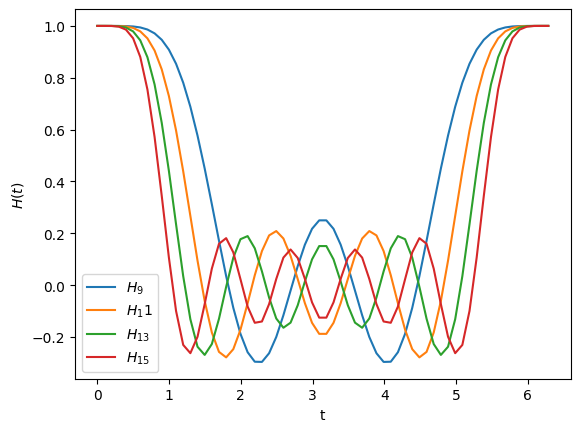

In [5]:
def task3():
    h_9 = lambda x: 1 / 429 * (179 + 270 * np.cos(x) + 60 * np.cos(2 * x) - 110 * np.cos(3 * x) + 30 * np.cos(4 * x))
    h_11 = lambda x: 1 / 429 * (143 + 240 * np.cos(x) + 120 * np.cos(2 * x) - 20 * np.cos(3 * x) - 90 * np.cos(4 * x) + 36 * np.cos(5 * x))
    h_13 = lambda x: 1 / 2431 * (677 + 1200 * np.cos(x) + 780 * np.cos(2 * x) + 220 * np.cos(3 * x) - 270 * np.cos(4 * x) - 396 * np.cos(5 * x) + 220 * np.cos(6 * x))
    h_15 = lambda x: 1 / 46189 * (11063 + 20250 * np.cos(x) + 15000 * np.cos(2 * x) + 7510 * np.cos(3 * x) - 330 * np.cos(4 * x) - 5874 * np.cos(5 * x) - 5720 * np.cos(6 * x) + 4290 * np.cos(7 * x))

    t = np.linspace(0, 2 * math.pi, 64)

    plt.plot(t, h_9(t), label=r'$H_9$')
    plt.plot(t, h_11(t), label=r'$H_11$')
    plt.plot(t, h_13(t), label=r'$H_{13}$')
    plt.plot(t, h_15(t), label=r'$H_{15}$')
    plt.xlabel('t')
    plt.ylabel(r'$H(t)$')
    plt.legend()
    plt.show()

task3()

4) Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 13, 15 и 21 точкам. Построим графики $\tilde H(f)$. Проинтерпретируем частотные свойства передаточных функций для различного количества точек.

$y_n = \frac {1} {320} (-3s_{n-7} - 6s_{n-6}-5s_{n-5}+3s_{n-4}+21s_{n-3}+46s_{n-2}-67s_{n-1}+74s_n+67s_{n+1}+46s_{n+2}+21s_{n+3}+3s_{n+4}-5s_{n+5}+6s_{n+6}-3s_{n+7})$

$y_n = \frac {1} {350} (-s_{n-10}-3s_{n-9}-5s_{n-8}-5s_{n-7}-2s_{n-6}+6s_{n-5}+18s_{n-4}+33s_{n-3}+47s_{n-2}+57s_{n-1}+60s_n+57s_{n+1}+47s_{n+2}+33s_{n+3}+18s_{n+4}+6s_{n+5}-2s_{n+6}-5s_{n+8}-3s_{n+9}-s_{n+10})$

Соответствующие передаточные функции:

$H_15(f) = \frac {1} {320} (74 + 134 cos(2\pi f) + 92cos(4\pi f) + 42cos(6\pi f) +6cos(8\pi f) -10 cos(10\pi f) -12cos(12\pi f) -6cos(14\pi f))$

$H_21(f) = \frac {1} {350} (60 + 114cos(2\pi f)+94cos(4\pi f)+66cos(6\pi f)+36cos(8\pi f)+12cos(10\pi f)-4cos(12\pi f)-10cos(14\pi f)-10cos(16\pi f)-6cos(18\pi f)-2cos(20\pi f))$

Графики изображены ниже.


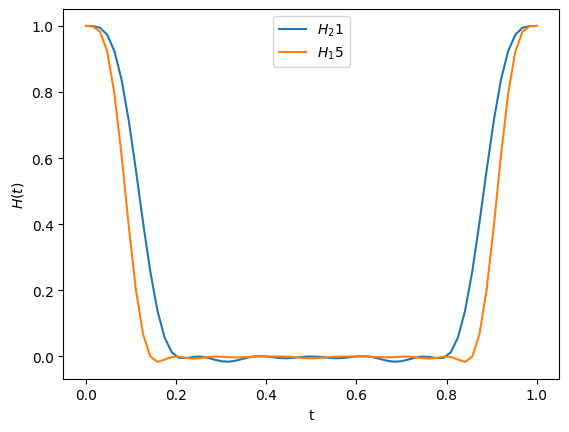

In [7]:
def task4():
    h_21 = lambda x: 1/320 * (74 + 134*np.cos(2*math.pi*x) + 92*np.cos(4*math.pi*x) + 42*np.cos(6*math.pi*x) + 6*np.cos(8*math.pi*x) - 10*np.cos(10*math.pi*x) - 12*np.cos(12*math.pi*x) - 6*np.cos(14*math.pi*x))
    h_15 = lambda x: 1/350 * (60 + 114*np.cos(2*math.pi*x) + 94*np.cos(4*math.pi*x) + 66*np.cos(6*math.pi*x) + 36*np.cos(8*math.pi*x) + 12*np.cos(10*math.pi*x) - 4*np.cos(12*math.pi*x) - 10*np.cos(14*math.pi*x) - 10*np.cos(16*math.pi*x) - 6*np.cos(18*math.pi*x) - 2*np.cos(20*math.pi*x))

    t = np.linspace(0, 1, 64)

    plt.plot(t, h_21(t), label=r'$H_21$')
    plt.plot(t, h_15(t), label=r'$H_15$')
    plt.xlabel('t')
    plt.ylabel(r'$H(t)$')
    plt.legend()
    plt.show()
task4()

5) Кривые, построенные в предыдущих пунктах, недостаточно информативны, так как значения на высоких частотах малы. Построим графики в логарифмической шкале. Для этого используются децибелы:
   
$$Дб = 201g(\frac {|y_n|} {s_n})$$

Графики изображены ниже.

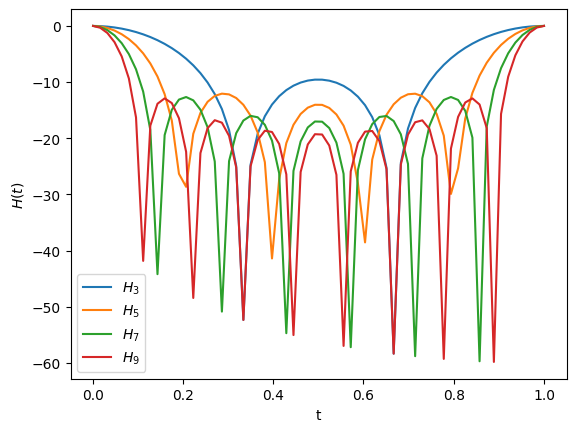

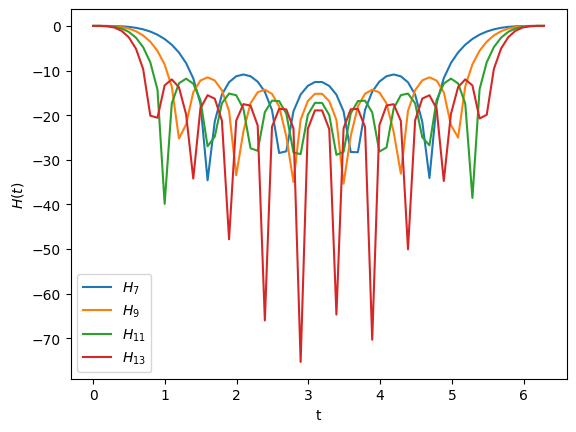

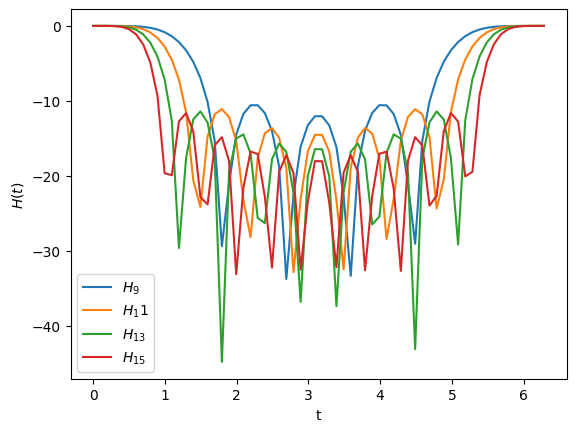

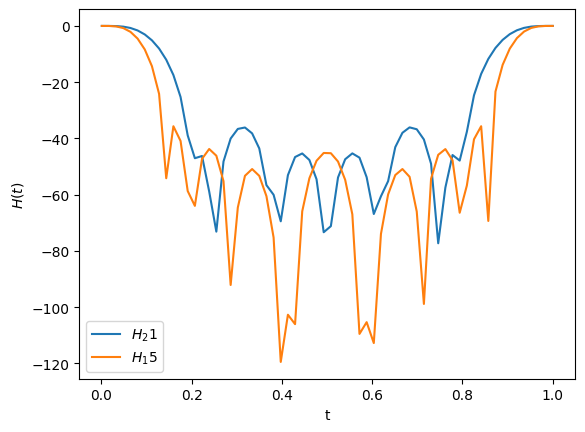

In [17]:
def task5():
    def _task1():
        h_3 = lambda x: np.sin(3 * math.pi * x) / (3 * np.sin(x * math.pi))
        h_5 = lambda x: np.sin(5 * math.pi * x) / (5 * np.sin(x * math.pi))
        h_7 = lambda x: np.sin(7 * math.pi * x) / (7 * np.sin(x * math.pi))
        h_9 = lambda x: np.sin(9 * math.pi * x) / (9 * np.sin(x * math.pi))

        t = np.linspace(0.001, 1, 64)

        plt.plot(t, 20*np.log10(np.abs(h_3(t))), label=r'$H_3$')
        plt.plot(t, 20*np.log10(np.abs(h_5(t))), label=r'$H_5$')
        plt.plot(t, 20*np.log10(np.abs(h_7(t))), label=r'$H_7$')
        plt.plot(t, 20*np.log10(np.abs(h_9(t))), label=r'$H_9$')
        plt.xlabel('t')
        plt.ylabel(r'$H(t)$')
        plt.legend()
        plt.show()

    def _task2():
        h_7 = lambda x: 1 / 21 * (7 + 12 * np.cos(x) + 6 * np.cos(2 * x) - 4 * np.cos(3 * x))
        h_9 = lambda x: 1 / 231 * (59 + 108 * np.cos(x) + 78 * np.cos(2 * x) + 28 * np.cos(3 * x) - 42 * np.cos(4 * x))
        h_11 = lambda x: 1 / 429 * (
                89 + 168 * np.cos(x) + 138 * np.cos(2 * x) + 88 * np.cos(3 * x) + 18 * np.cos(4 * x) - 72 * np.cos(
            5 * x))
        h_13 = lambda x: 1 / 143 * (
                25 + 48 * np.cos(x) + 42 * np.cos(2 * x) + 32 * np.cos(3 * x) + 18 * np.cos(4 * x) - 22 * np.cos(6 * x))

        t = np.linspace(0.001, 2*math.pi, 64)

        plt.plot(t, 20*np.log10(np.abs(h_7(t))), label=r'$H_7$')
        plt.plot(t, 20*np.log10(np.abs(h_9(t))), label=r'$H_9$')
        plt.plot(t, 20*np.log10(np.abs(h_11(t))), label=r'$H_{11}$')
        plt.plot(t, 20*np.log10(np.abs(h_13(t))), label=r'$H_{13}$')
        plt.xlabel('t')
        plt.ylabel(r'$H(t)$')
        plt.legend()
        plt.show()

    def _task3():
        h_9 = lambda x: 1 / 429 * (
                    179 + 270 * np.cos(x) + 60 * np.cos(2 * x) - 110 * np.cos(3 * x) + 30 * np.cos(4 * x))
        h_11 = lambda x: 1 / 429 * (
                    143 + 240 * np.cos(x) + 120 * np.cos(2 * x) - 20 * np.cos(3 * x) - 90 * np.cos(4 * x) + 36 * np.cos(
                5 * x))
        h_13 = lambda x: 1 / 2431 * (677 + 1200 * np.cos(x) + 780 * np.cos(2 * x) + 220 * np.cos(3 * x) - 270 * np.cos(
            4 * x) - 396 * np.cos(5 * x) + 220 * np.cos(6 * x))
        h_15 = lambda x: 1 / 46189 * (
                    11063 + 20250 * np.cos(x) + 15000 * np.cos(2 * x) + 7510 * np.cos(3 * x) - 330 * np.cos(
                4 * x) - 5874 * np.cos(5 * x) - 5720 * np.cos(6 * x) + 4290 * np.cos(7 * x))

        t = np.linspace(0.001, 2*math.pi, 64)

        plt.plot(t, 20*np.log10(np.abs(h_9(t))), label=r'$H_9$')
        plt.plot(t, 20*np.log10(np.abs(h_11(t))), label=r'$H_11$')
        plt.plot(t, 20*np.log10(np.abs(h_13(t))), label=r'$H_{13}$')
        plt.plot(t, 20*np.log10(np.abs(h_15(t))), label=r'$H_{15}$')
        plt.xlabel('t')
        plt.ylabel(r'$H(t)$')
        plt.legend()
        plt.show()

    def _task4():
        h_21 = lambda x: 1 / 320 * (74 + 134 * np.cos(2 * math.pi * x) + 92 * np.cos(4 * math.pi * x) + 42 * np.cos(
            6 * math.pi * x) + 6 * np.cos(8 * math.pi * x) - 10 * np.cos(10 * math.pi * x) - 12 * np.cos(
            12 * math.pi * x) - 6 * np.cos(14 * math.pi * x))
        h_15 = lambda x: 1 / 350 * (60 + 114 * np.cos(2 * math.pi * x) + 94 * np.cos(4 * math.pi * x) + 66 * np.cos(
            6 * math.pi * x) + 36 * np.cos(8 * math.pi * x) + 12 * np.cos(10 * math.pi * x) - 4 * np.cos(
            12 * math.pi * x) - 10 * np.cos(14 * math.pi * x) - 10 * np.cos(16 * math.pi * x) - 6 * np.cos(
            18 * math.pi * x) - 2 * np.cos(20 * math.pi * x))

        t = np.linspace(0.001, 1, 64)

        plt.plot(t, 20*np.log10(np.abs(h_21(t))), label=r'$H_21$')
        plt.plot(t, 20*np.log10(np.abs(h_15(t))), label=r'$H_15$')
        plt.xlabel('t')
        plt.ylabel(r'$H(t)$')
        plt.legend()
        plt.show()

    _task1()
    _task2()
    _task3()
    _task4()

task5()

Графики позволяют сделать заключение о том, что шум является высокочастотным, а сигнал низкочастотным. Формулы сглаживания пропускают одни частоты, а другие устраняют.

6) Были получены графики передаточных функций нерекурсивных фильтров, соответствующих сглаживанию прямой линией, полиномом второй степени и формулам Спенсера. Графики соответствуют ожиданиям.

## Выводы

В ходе работы